/Users/michaelpoppel/PycharmProjects/ConstraintDrivenQAOA/venv/lib/python3.11/site-packages/qiskit/visualization/circuit/matplotlib.py:270: UserWarning: Style JSON file 'default.json' not found in any of these locations: /Users/michaelpoppel/PycharmProjects/ConstraintDrivenQAOA/venv/lib/python3.11/site-packages/qiskit/visualization/circuit/styles/default.json, default.json. Will use default style.
  self._style, def_font_ratio = load_style(
findfont: Font family 'Liberation Sans' not found.


2-QUBIT XY MIXER (QAOA)
Creating 2-qubit XY mixer with β parameter...
Implements: exp(-iβH_XY) where H_XY = -(X₀X₁ + Y₀Y₁)


findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.


✓ Saved circuit as '2qubit_xy_mixer.png' (Method 1)


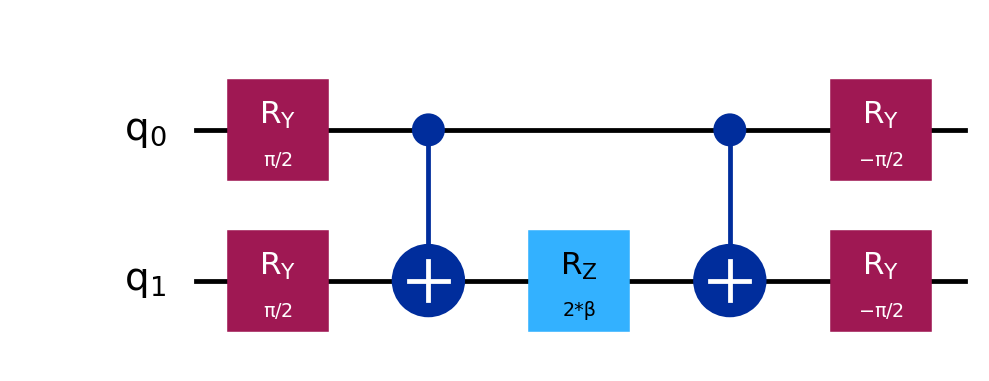


Circuit text representation:
     ┌─────────┐                     ┌──────────┐
q_0: ┤ Ry(π/2) ├──■───────────────■──┤ Ry(-π/2) ├
     ├─────────┤┌─┴─┐┌─────────┐┌─┴─┐├──────────┤
q_1: ┤ Ry(π/2) ├┤ X ├┤ Rz(2*β) ├┤ X ├┤ Ry(-π/2) ├
     └─────────┘└───┘└─────────┘└───┘└──────────┘

XY Mixer Effect on Different States:
Using β = π/4 for demonstration
(In QAOA, β is optimized along with γ parameters)


Initial state |01⟩:
  |01⟩: 0.500
  |10⟩: 0.500

Initial state |10⟩:
  |01⟩: 0.500
  |10⟩: 0.500

QAOA MIXER CONCEPT:
✓ XY mixer creates state exchange: |01⟩ ↔ |10⟩
✓ β (beta) parameter controls mixing strength
✓ Preserves total spin (magnetization)
✓ Building block for QAOA and quantum annealing
✓ In QAOA: alternates with cost Hamiltonian (γ parameter)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit
from qiskit.visualization import circuit_drawer
from qiskit.circuit import Parameter

# Fix font warnings
plt.rcParams['font.family'] = ['DejaVu Sans', 'Liberation Sans', 'Arial', 'sans-serif']
plt.rcParams['mathtext.default'] = 'regular'

def create_2qubit_xy_mixer(beta=np.pi/8):
    """Create the 2-qubit XY mixer circuit with QAOA parameter beta."""
    
    qc = QuantumCircuit(2, name='2Q_XY_Mixer')
    
    # Create symbolic parameter for display
    beta_param = Parameter('β')
    
    # XY interaction between qubits 0 and 1
    qc.ry(np.pi/2, 0)       # Rotate qubit 0 to X-Y plane
    qc.ry(np.pi/2, 1)       # Rotate qubit 1 to X-Y plane
    qc.cx(0, 1)             # First CNOT
    qc.rz(2*beta_param, 1)  # Z-rotation with symbolic 2β parameter
    qc.cx(0, 1)             # Second CNOT
    qc.ry(-np.pi/2, 0)      # Rotate qubit 0 back
    qc.ry(-np.pi/2, 1)      # Rotate qubit 1 back
    
    # For simulation, we need to bind the parameter to actual values
    try:
        # Try assign_parameters method
        qc_bound = qc.assign_parameters({beta_param: beta})
    except AttributeError:
        # Fallback: create a separate numerical circuit
        qc_bound = QuantumCircuit(2, name='2Q_XY_Mixer_Bound')
        qc_bound.ry(np.pi/2, 0)
        qc_bound.ry(np.pi/2, 1)
        qc_bound.cx(0, 1)
        qc_bound.rz(2*beta, 1)  # Use numerical value
        qc_bound.cx(0, 1)
        qc_bound.ry(-np.pi/2, 0)
        qc_bound.ry(-np.pi/2, 1)
    
    return qc, qc_bound

def plot_2qubit_xy_mixer():
    """Plot the 2-qubit XY mixer circuit."""
    
    qc_symbolic, qc_bound = create_2qubit_xy_mixer()
    
    # Use symbolic circuit for display (shows 2β)
    try:
        # Method 1: Direct matplotlib circuit drawing
        fig, ax = plt.subplots(figsize=(10, 4))
        qc_symbolic.draw(output='mpl', ax=ax, style='default', fold=None, scale=1.5)
        
        plt.tight_layout()
        plt.savefig('2qubit_xy_mixer.png', dpi=600, bbox_inches='tight', 
                    facecolor='white', edgecolor='none')
        
        print("✓ Saved circuit as '2qubit_xy_mixer.png' (Method 1)")
        plt.show()
        
    except Exception as e:
        print(f"Method 1 failed: {e}")
        
        # Method 2: Use circuit_drawer but handle differently
        try:
            plt.figure(figsize=(10, 4))
            fig = circuit_drawer(qc_symbolic, output='mpl', style='default', fold=None, scale=1.5)
            
            if fig is not None:
                plt.savefig('2qubit_xy_mixer.png', dpi=600, bbox_inches='tight', 
                            facecolor='white', edgecolor='none')
                print("✓ Saved circuit as '2qubit_xy_mixer.png' (Method 2)")
                plt.show()
            else:
                print("Circuit drawer returned None")
                
        except Exception as e2:
            print(f"Method 2 also failed: {e2}")
            print("Falling back to text-only representation")
    
    # Always show text representation
    print("\nCircuit text representation:")
    print(qc_symbolic.draw(output='text'))
    
    return qc_symbolic, qc_bound

def demonstrate_xy_effect():
    """Demonstrate what the XY mixer does to different input states."""
    
    try:
        # Try newer Qiskit first
        from qiskit_aer import Aer
        from qiskit import transpile
        use_aer = True
    except ImportError:
        try:
            # Try older Qiskit
            from qiskit import Aer
            from qiskit import transpile
            use_aer = True
        except ImportError:
            # Fall back to basic quantum_info
            from qiskit.quantum_info import Statevector
            use_aer = False
    
    print("\nXY Mixer Effect on Different States:")
    print("="*40)
    print("Using β = π/4 for demonstration")
    print("(In QAOA, β is optimized along with γ parameters)")
    print()
    
    # Test on key states
    test_states = ['01', '10']
    
    for initial_state in test_states:
        # Create circuit with initial state
        qc = QuantumCircuit(2)
        
        # Prepare initial state
        if initial_state[0] == '1':
            qc.x(0)
        if initial_state[1] == '1':
            qc.x(1)
        
        # Add XY mixer (use bound circuit for simulation)
        _, xy_mixer_bound = create_2qubit_xy_mixer(beta=np.pi/4)  # π/4 for clearer demo
        qc = qc.compose(xy_mixer_bound)
        
        if use_aer:
            # Use Aer backend
            backend = Aer.get_backend('statevector_simulator')
            transpiled_qc = transpile(qc, backend)
            job = backend.run(transpiled_qc)
            result = job.result()
            statevector = result.get_statevector()
        else:
            # Use quantum_info Statevector
            statevector = Statevector.from_instruction(qc)
        
        print(f"\nInitial state |{initial_state}⟩:")
        
        # Display final state probabilities
        probs = np.abs(statevector)**2
        states = ['|00⟩', '|01⟩', '|10⟩', '|11⟩']
        
        for i, (state, prob) in enumerate(zip(states, probs)):
            if prob > 0.001:
                print(f"  {state}: {prob:.3f}")

def main():
    """Generate and demonstrate the 2-qubit XY mixer."""
    
    print("2-QUBIT XY MIXER (QAOA)")
    print("="*30)
    print("Creating 2-qubit XY mixer with β parameter...")
    print("Implements: exp(-iβH_XY) where H_XY = -(X₀X₁ + Y₀Y₁)")
    print()
    
    # Plot the circuit
    qc_symbolic, qc_bound = plot_2qubit_xy_mixer()
    
    # Demonstrate the effect
    demonstrate_xy_effect()
    
    print("\n" + "="*30)
    print("QAOA MIXER CONCEPT:")
    print("✓ XY mixer creates state exchange: |01⟩ ↔ |10⟩")
    print("✓ β (beta) parameter controls mixing strength")
    print("✓ Preserves total spin (magnetization)")
    print("✓ Building block for QAOA and quantum annealing")
    print("✓ In QAOA: alternates with cost Hamiltonian (γ parameter)")

if __name__ == "__main__":
    main()